In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv('weather.csv')
df

,year,month,day,hour,air_temp,dew_point,wind_speed
0,2009,1,1,1,-13.3,-16.7,15.0
1,2009,1,1,2,-13.3,-16.1,26.0
2,2009,1,1,3,-12.2,-15.6,0.0
3,2009,1,1,4,-11.7,-15.0,0.0
4,2009,1,1,5,-11.1,-15.0,15.0
...,...,...,...,...,...,...,...
4335,2009,6,30,19,17.8,11.1,41.0
4336,2009,6,30,20,18.9,11.7,46.0
4337,2009,6,30,21,18.3,11.1,36.0
4338,2009,6,30,22,18.9,11.1,46.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        4340 non-null   int64  
 1   month       4340 non-null   int64  
 2   day         4340 non-null   int64  
 3   hour        4340 non-null   int64  
 4   air_temp    4161 non-null   float64
 5   dew_point   4161 non-null   float64
 6   wind_speed  4151 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 237.5 KB


In [11]:
df.isna().sum()

year            0
month           0
day             0
hour            0
air_temp      179
dew_point     179
wind_speed    189
dtype: int64

In [12]:
df.describe()

,year,month,day,hour,air_temp,dew_point,wind_speed
count,4340.0,4340.000000,4340.000000,4340.000000,4161.000000,4161.000000,4151.000000
mean,2009.0,3.507143,15.603226,11.505069,4.738909,-0.982672,43.335823
std,0.0,1.709266,8.737085,6.923326,11.401805,10.590351,24.630659
min,2009.0,1.000000,1.000000,0.000000,-29.400000,-32.800000,0.000000
25%,2009.0,2.000000,8.000000,5.750000,-3.300000,-8.300000,26.000000
50%,2009.0,4.000000,16.000000,12.000000,4.400000,-1.100000,41.000000
75%,2009.0,5.000000,23.000000,18.000000,13.300000,7.200000,62.000000
max,2009.0,6.000000,31.000000,23.000000,33.300000,23.300000,165.000000


Remove NULL Value

In [13]:
from sklearn.impute import SimpleImputer
df.replace('NaN',np.NaN,inplace=True)
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
idf=pd.DataFrame(imp.fit_transform(df))
idf.columns=df.columns
idf.index=df.index
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        4340 non-null   float64
 1   month       4340 non-null   float64
 2   day         4340 non-null   float64
 3   hour        4340 non-null   float64
 4   air_temp    4340 non-null   float64
 5   dew_point   4340 non-null   float64
 6   wind_speed  4340 non-null   float64
dtypes: float64(7)
memory usage: 237.5 KB


In [14]:
idf.isna().sum()

year          0
month         0
day           0
hour          0
air_temp      0
dew_point     0
wind_speed    0
dtype: int64

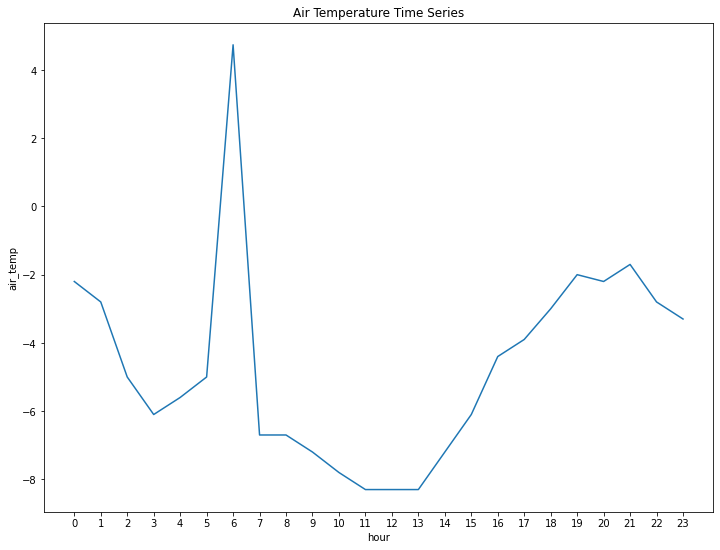

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

time_data = idf.loc[(idf['month'] == 2) & (idf['day'] == 15)]
time_data = time_data.set_index('hour')

plt.figure(figsize=(12, 9))
plt.plot(time_data['air_temp'].interpolate(method='nearest'))
plt.xticks(np.arange(0, 24, step=1))
plt.title('Air Temperature Time Series')
plt.xlabel('hour')
plt.ylabel('air_temp')
plt.show()

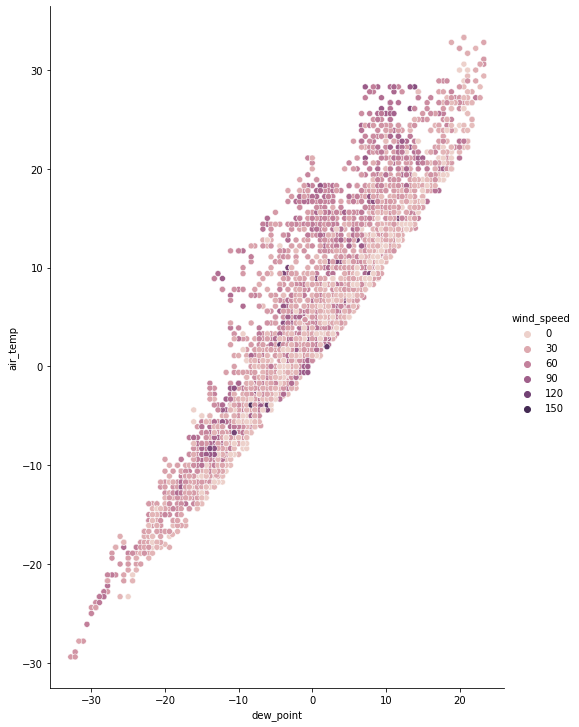

In [39]:
import seaborn as sns
full_df = pd.get_dummies(idf)
sns.relplot(
    data=full_df,
    x="dew_point", y="air_temp", hue='wind_speed', height=10, aspect=.7);

The Gap between each value is to big, here we need to convert value into 0 - 3

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 3))
idf = scaler.fit_transform(idf)

df_idf = pd.DataFrame(idf)
df_idf.info

<bound method DataFrame.info of         0    1    2         3         4         5         6
0     0.0  0.0  0.0  0.130435  0.770335  0.860963  0.272727
1     0.0  0.0  0.0  0.260870  0.770335  0.893048  0.472727
2     0.0  0.0  0.0  0.391304  0.822967  0.919786  0.000000
3     0.0  0.0  0.0  0.521739  0.846890  0.951872  0.000000
4     0.0  0.0  0.0  0.652174  0.875598  0.951872  0.272727
...   ...  ...  ...       ...       ...       ...       ...
4335  0.0  3.0  2.9  2.478261  2.258373  2.347594  0.745455
4336  0.0  3.0  2.9  2.608696  2.311005  2.379679  0.836364
4337  0.0  3.0  2.9  2.739130  2.282297  2.347594  0.654545
4338  0.0  3.0  2.9  2.869565  2.311005  2.347594  0.836364
4339  0.0  3.0  2.9  3.000000  2.282297  2.379679  0.836364

[4340 rows x 7 columns]>

In [16]:
#when use
df_idf = df_idf.applymap(np.int64)
df_idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4340 non-null   int64
 1   1       4340 non-null   int64
 2   2       4340 non-null   int64
 3   3       4340 non-null   int64
 4   4       4340 non-null   int64
 5   5       4340 non-null   int64
 6   6       4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [46]:
# X = df_idf.drop(columns=[0,6])
# y = df_idf[6]
# Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

X = idf.drop(columns=["year","wind_speed"])
y = idf["wind_speed"]
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [47]:
Xtrain

,month,day,hour,air_temp,dew_point
385,1.0,17.0,2.0,-20.0,-26.1
1477,3.0,3.0,14.0,-8.9,-12.8
3380,5.0,21.0,21.0,28.3,11.1
4182,6.0,24.0,10.0,22.2,21.1
3230,5.0,15.0,15.0,13.3,8.9
...,...,...,...,...,...
174,1.0,8.0,7.0,-9.4,-13.3
1816,3.0,17.0,17.0,19.4,6.7
3709,6.0,4.0,14.0,13.9,3.3
3494,5.0,26.0,15.0,10.6,8.3


In [48]:
Xtest

,month,day,hour,air_temp,dew_point
613,1.0,26.0,14.0,-17.2,-22.2
3047,5.0,8.0,0.0,20.0,6.1
810,2.0,3.0,19.0,-7.8,-12.2
436,1.0,19.0,5.0,-12.8,-14.4
3103,5.0,10.0,8.0,5.0,2.8
...,...,...,...,...,...
1535,3.0,6.0,0.0,13.9,8.9
964,2.0,10.0,5.0,6.1,6.1
1738,3.0,14.0,11.0,-3.3,-6.1
3559,5.0,29.0,8.0,13.3,11.7


In [49]:
ytest

613     26.000000
3047    62.000000
810     72.000000
436     31.000000
3103    26.000000
          ...    
1535    67.000000
964     51.000000
1738    26.000000
3559    41.000000
4140    43.335823
Name: wind_speed, Length: 868, dtype: float64

In [50]:
ytrain

385      46.0
1477      0.0
3380     67.0
4182     21.0
3230     57.0
        ...  
174      57.0
1816    113.0
3709      0.0
3494     41.0
678      57.0
Name: wind_speed, Length: 3472, dtype: float64

Consequently python (scikit-learn) expects you to pass something that is label-like, thus: integer, string, etc. floats are not a typical encoding form of finite space, they are used for regression. Thus is short you seem to be confusing classification and regression. How to distinguish?

-if you have y as floats, but only a finite number of different values can be obtained, and all of them are obtained in training set, then this is classification - just convert your values to strings or integers and you are good to go.

-if you have y as floats, and this are actuall real values, and you can have plenty of values, even not seen in the training set and you expect your model to somehow "interpolate" this is regression and you are supposed to use DecisionTreeRegressor instead.

In [22]:
#with int64 data type
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(Xtrain,ytrain)
pred = model.predict(Xtest)
accuracy_score(ytest, pred)

0.7315668202764977

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(Xtrain,ytrain)

ypred = model.predict(Xtest)

df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred},index=None)
print(df.head(10))

      Actual  Predicted
613     26.0  43.384992
3047    62.0  44.994225
810     72.0  46.987382
436     31.0  38.338779
3103    26.0  30.123668
379     67.0  49.171627
665     36.0  49.819931
560     26.0  42.891792
2073    51.0  38.383632
2820    82.0  40.062437


In [55]:
coba = model.predict([[0.0, 0.0 , 0.130435 , 0.770335 , 0.860963]])
coba

array([48.86352116])

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Squared Error :  497.31355877802025
Mean Absolute Error :  17.144130800299507
